-analisis

In [1]:
# importamos nuestras librerias
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go

In [2]:
#traemos nuestros datos.
aa = pd.df = pd.read_csv("avis.csv",sep='|',encoding='utf-8')

In [3]:
# vista previa de nuestros datos.
aa.head()

,fecha,hora,pais,operadora,vuelo_numero,ruta,tipo_aeronave,registro_aeronave,abordo,pasajeros,tripulantes,bajas,bajas_pasajeros,bajas_tripulacion,bajas_tierra,Descripcion
0,1908-09-17,17:18,other,Military US Army,NaN,Demonstration,Wright Brothers,NaN,2,1.0,1.0,1,1.0,0.0,0.0,During a demonstration flight a US Army flyer ...
1,1909-09-07,NaN,France,NaN,NaN,Air show,Wright Brothers,NaN,1,0.0,1.0,1,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,other,Military US Navy,NaN,Test flight,other,NaN,5,0.0,5.0,5,0.0,5.0,0.0,First US dirigible Akron exploded just offshor...
3,1913-08-06,NaN,Canada,Private,NaN,NaN,other,NaN,1,0.0,1.0,1,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,other,Military German Navy,NaN,NaN,other,NaN,20,NaN,NaN,14,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [4]:
#informacion
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              4991 non-null   object 
 1   hora               3492 non-null   object 
 2   pais               4991 non-null   object 
 3   operadora          4981 non-null   object 
 4   vuelo_numero       1325 non-null   object 
 5   ruta               4242 non-null   object 
 6   tipo_aeronave      4991 non-null   object 
 7   registro_aeronave  189 non-null    float64
 8   abordo             4991 non-null   int64  
 9   pasajeros          4787 non-null   float64
 10  tripulantes        4789 non-null   float64
 11  bajas              4991 non-null   int64  
 12  bajas_pasajeros    4770 non-null   float64
 13  bajas_tripulacion  4771 non-null   float64
 14  bajas_tierra       4959 non-null   float64
 15  Descripcion        4940 non-null   object 
dtypes: float64(6), int64(2),

- contamos con una linea de tiempo en la columna 'fecha'
- la columna 'hora' podria ayudarnos a ver cuales son las horas pico. 
-la columna 'pais' colabora a la ubicacion (buen filtro)(cualitativo)
-'operadora' filtro (cualitativo)
-'numero de vuelo' no considero una columna tan relevante ya que es muy escasa.
-la 'ruta' tambien es referencia a un trayecto(podriamos filtrar los lugares x ocurrencias.)
-el 'tipo_aeronave' podria ayudar a decidir si deseas subir a ese avion .
-'registro_aeronave' un poco innecesario  ya que es muy escaso.
-de las columnas:
    -abordo: podemos tomar la totalidad de personas abordo de la aeronave.
    -pasajeros: cuantos de ellos eran pasajeros.
    -tripulantes: cuantos de ellos eran parte del personal.
    -bajas: es un total de muertes en cada accidente.
    -bajas_pasajeros y bajas_tripulantes: especifican del total de bajas, cuantas fueron de pasajeros y cuantas del personal de servicio de la aeronave.
    -bajas_tierra: nos referimos a las bajas que se presentaron antes o despues del aterrizaje del avion. ejemplo 'al encender motores se incinera el avion y muere toda la tripulacion' ó 'el avion cae sobre poblacion civil'
- por ultimo tenemos una'descripcion' o testimonio de lo sucedido.

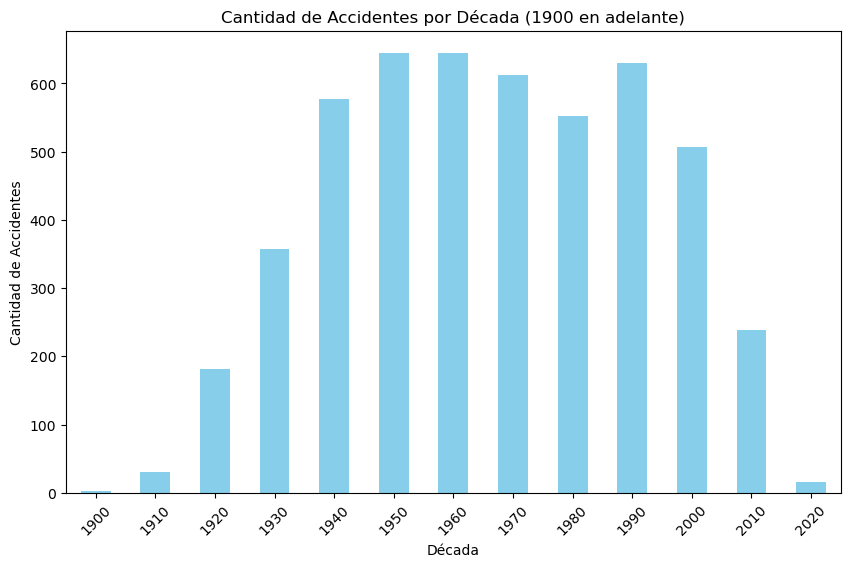

In [5]:


# ya que el analisis es desde 1900.

aa['fecha'] = pd.to_datetime(aa['fecha'])

# creamos la columna decada
aa['decada'] = (aa['fecha'].dt.year // 10) * 10

# contamos los accidentes en cada decada
accidentes_por_decada = aa['decada'].value_counts().sort_index()

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_decada.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Accidentes por Década (1900 en adelante)')
plt.xlabel('Década')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

- de la decada de '1910' a '1920' hay un brinco gigantesco en el numero de accidentes.(posible causa: primera guerra mundial.1914-1918)
-en las decada entre '1910' y '1940' el crecimiento de accidentes fue casi constante.( posible causa: ambas guerras mundiales, segunda guerra sino japonesa, la guerra del pacifico, )
-apartir de '1950' no queda mas que una casi constante que empieza a variar y disminuir apartir de el sigo 'XXI'


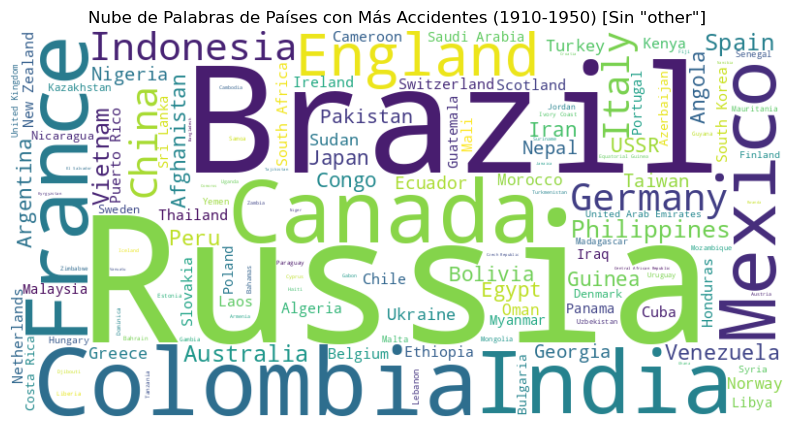

In [6]:
# Filtrar el DataFrame para excluir 'other'
aa_filtrado_sin_other = aa[aa['pais'] != 'other']

# Agrupar por país y contar la cantidad de accidentes en cada país
accidentes_por_pais = aa_filtrado_sin_other['pais'].value_counts()

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(accidentes_por_pais)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de Palabras de Países con Más Accidentes (1910-1950) [Sin "other"]')
plt.axis('off')
plt.show()



segun podemos ver en la grafica: los paises con mas accidentes en las decadas de '1910' a '1950' segun los datos que se nos entregaron(existen otro valores que no han sido incluidos por falta de informacion.)
podemos atribuir estos datos a los acontecimientos debidos a los enfrentamientos militares de estas epocas.

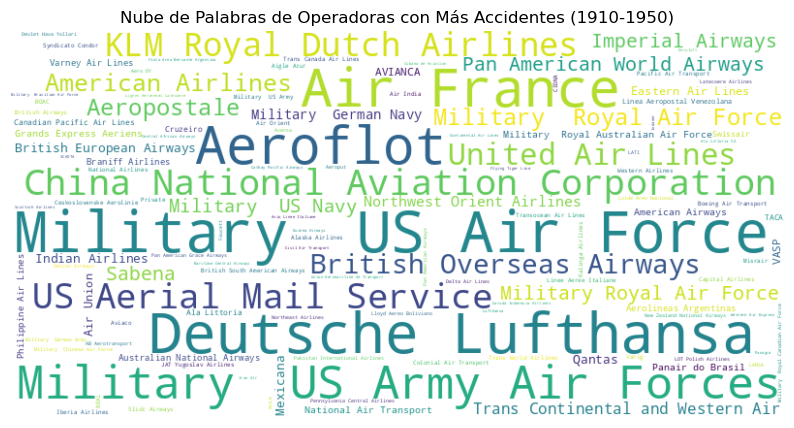

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filtrar el DataFrame para el rango de décadas y excluir 'other' y valores vacíos
aa_filtrado = aa[(aa['decada'] >= 1910) & (aa['decada'] <= 1950) & (aa['operadora'] != 'other') & (aa['operadora'] != '')]

# Contar la cantidad de accidentes por operadora
accidentes_por_operadora = aa_filtrado['operadora'].value_counts()

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(accidentes_por_operadora)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de Palabras de Operadoras con Más Accidentes (1910-1950)')
plt.axis('off')
plt.show()



confirmando la teoria anterior, podemos observar que los principales  operadores participantes de accidentes son operadores relacionados al ambito militar.

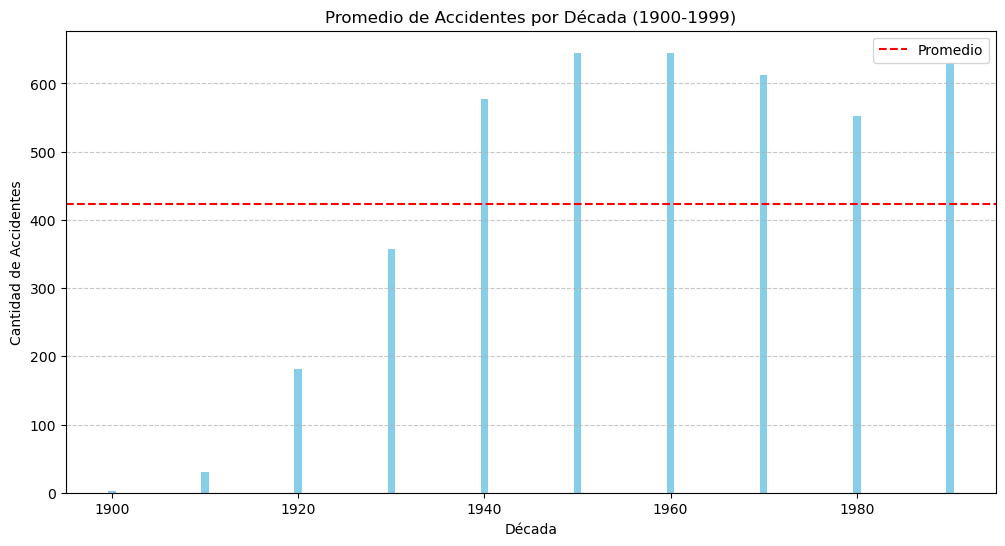

In [8]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para el rango de décadas desde 1900 hasta 1999
aa_filtrado = aa[(aa['decada'] >= 1900) & (aa['decada'] < 2000)]

# Calcular el promedio de accidentes por década
promedio_accidentes_por_decada = aa_filtrado.groupby('decada').size().mean()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(aa_filtrado['decada'].unique(), aa_filtrado['decada'].value_counts().sort_index(), color='skyblue')
plt.axhline(promedio_accidentes_por_decada, color='red', linestyle='--', label='Promedio')
plt.xlabel('Década')
plt.ylabel('Cantidad de Accidentes')
plt.title('Promedio de Accidentes por Década (1900-1999)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
aa['ruta'] = aa['ruta'].replace('Test flight', 'Test')

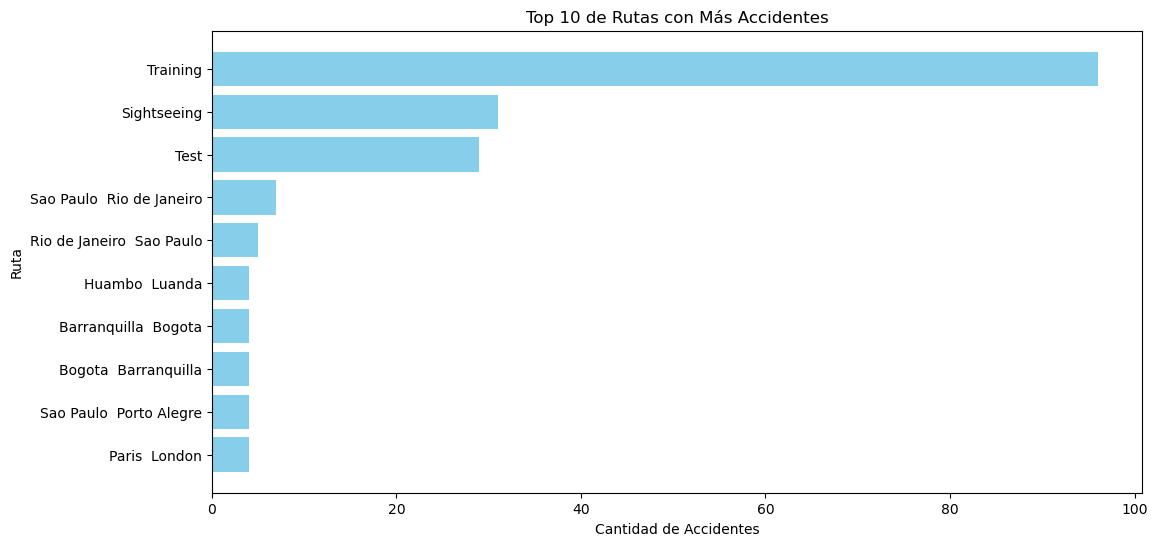

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Contar la cantidad de accidentes por ruta y ordenar en orden descendente
rutas_con_accidentes = aa['ruta'].value_counts().reset_index()
rutas_con_accidentes.columns = ['Ruta', 'Cantidad de Accidentes']
rutas_con_accidentes = rutas_con_accidentes.sort_values(by='Cantidad de Accidentes', ascending=False)

# Tomar las 10 rutas con más accidentes (puedes ajustar este número)
top_10_rutas = rutas_con_accidentes.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_10_rutas['Ruta'], top_10_rutas['Cantidad de Accidentes'], color='skyblue')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Ruta')
plt.title('Top 10 de Rutas con Más Accidentes')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la ruta con más accidentes en la parte superior
plt.show()


las rutas refieren a el recorrido que estaba realizando la aeronave, la grafica nos muestra que los 3 primeros puestos se ocupan para el entrenamiento, turismo y testeo de aeronaves.

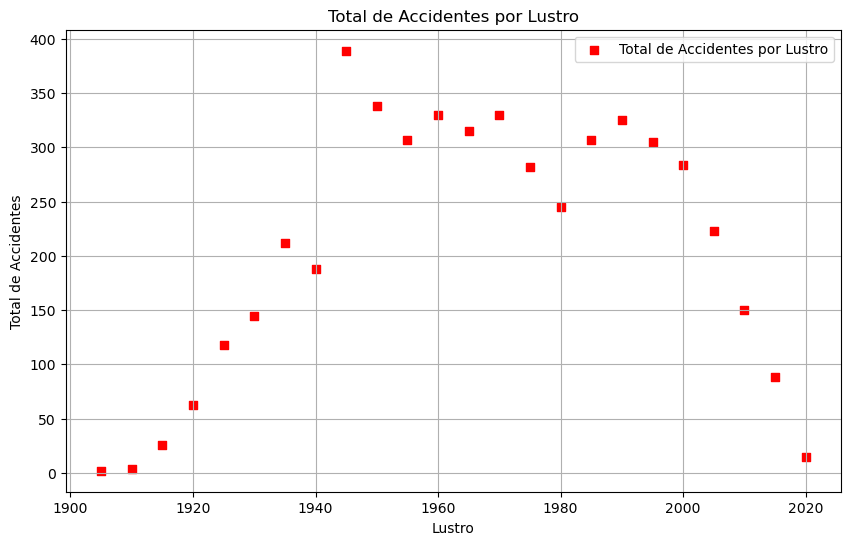

In [18]:
import matplotlib.pyplot as plt
import pandas as pd


aa['fecha'] = pd.to_datetime(aa['fecha'])

# Extrae el año de cada fecha
aa['año'] = aa['fecha'].dt.year

# Crea una columna 'lustro' que agrupe los años en lustros
aa['lustro'] = (aa['año'] // 5) * 5

# Calcula el total de accidentes por lustro
accidentes_por_lustro = aa.groupby('lustro').size()

# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(accidentes_por_lustro.index, accidentes_por_lustro.values, marker='s', color='r', label='Total de Accidentes por Lustro')
plt.title('Total de Accidentes por Lustro')
plt.xlabel('Lustro')
plt.ylabel('Total de Accidentes')
plt.grid(True)

# Muestra la leyenda
plt.legend()

# Muestra el gráfico
plt.show()


de nuevo se nota mucho el brinco producido desde 1939 a 1945.
tambien el descenso de accidentes con la entrada de nuevas tecnologia apartir del nuevo milenio.